In [234]:
#     Parameter

steps = 1

In [235]:
import pandas as pd
import numpy as np
from keras.layers import Dense, BatchNormalization, Dropout, LSTM, SimpleRNN, Flatten, CuDNNLSTM
from keras.models import Sequential
import keras
import tensorflow
import matplotlib.pyplot as plt
import random as rand

In [236]:
df = pd.read_excel("all_data.xlsx", names=[i for i in range(1,21)])
df

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,1000000000000000000000100000000000000000000000...,0100000000000000000000010000000000000000000000...,0010000000000000000000001000000000000000000000...,0001000000000000000000000010000000000000000000...,0000100000000000000000000001000000000000000000...,0000010000000000000000000000000001000000000000...,0000001000000000000000000000000000001000000000...,0000000100000000000000000000000000000010000000...,0000000010000000000000000000000000000001000000...,0000000001000000000000000000000000000000000100...,0000000000100000000000000000000000000000000000...,0000000000010000000000000000000000000000000000...,0000000000001000000000000000000000000000000000...,0000000000000100000000000000000000000000000000...,0000000000000010000000000000000000000000000000...,0000000000000001000000000000000000000000000000...,0000000000000000100000000000000000000000000000...,0000000000000000010000000000000000000000000000...,0000000000000000001000000000000000000000000000...,0000000000000000000100000000000000000000000000...
1,1000000000000000000000010000000000000000000000...,0100000000000000000000000010000000000000000000...,0010000000000000000000000000010000000000000000...,0001000000000000000000000000000000000000001000...,0000100000000000000000000000000000000000000010...,0000010000000000000000000000000000000000000001...,0000001000000000000000000000000000000000000000...,0000000100000000000000000000000000000000000000...,0000000010000000000000000000000000000000000000...,0000000001000000000000000000000000000000000000...,0000000000100000000000000000000000000000000000...,0000000000010000000000000000000000000000000000...,0000000000001000000000000000000000000000000000...,0000000000000100000000000000000000000000000000...,0000000000000010000000000000000000000000000000...,0000000000000001000000000000000000000000000000...,0000000000000000100000000000000000000000000000...,0000000000000000010000000000000000000000000000...,0000000000000000001000000000000000000000000000...,0000000000000000000100000000000000000000000000...
2,1000000000000000000000100000000000000000000000...,0100000000000000000000000000001000000000000000...,0010000000000000000000000000000000000010000000...,0001000000000000000000000000000000000000000010...,0000100000000000000000000000000000000000000000...,0000010000000000000000000000000000000000000000...,0000001000000000000000000000000000000000000000...,0000000100000000000000000000000000000000000000...,0000000010000000000000000000000000000000000000...,0000000001000000000000000000000000000000000000...,0000000000100000000000000000000000000000000000...,0000000000010000000000000000000000000000000000...,0000000000001000000000000000000000000000000000...,0000000000000100000000000000000000000000000000...,0000000000000010000000000000000000000000000000...,0000000000000001000000000000000000000000000000...,0000000000000000100000000000000000000000000000...,0000000000000000010000000000000000000000000000...,0000000000000000001000000000000000000000000000...,0000000000000000000100000000000000000000000000...
3,1000000000000000000000100000000000000000000000...,0100000000000000000000010000000000000000000000...,0010000000000000000000000000100000000000000000...,0001000000000000000000000000000000100000000000...,0000100000000000000000000000000000010000000000...,0000010000000000000000000000000000000000000000...,0000001000000000000000000000000000000000000000...,0000000100000000000000000000000000000000000000...,0000000010000000000000000000000000000000000000...,0000000001000000000000000000000000000000000000...,0000000000100000000000000000000000000000000000...,0000000000010000000000000000000000000000000000...,0000000000001000000000000000000000000000000000...,0000000000000100000000000000000000000000000000...,0000000000000010000000000000000000000000000000...,0000000000000001000000000000000000000000000000...,0000000000000000100000000000000000000000000000...,0000000000000000010000000000000000000000000000...,0000000000000000001000000000000000000000

In [237]:
library = pd.read_excel("Library.xlsx", names=["Values"])
library

,Values
0,1000000000000000000010000000000000000000000000...
1,1000000000000000000001000000000000000000000000...
2,1000000000000000000000100000000000000000000000...
3,1000000000000000000000010000000000000000000000...
4,1000000000000000000000001000000000000000000000...
...,...
1215,0000000000000000000100000000000000000000000000...
1216,0000000000000000000100000000000000000000000000...
1217,0000000000000000000100000000000000000000000000...
1218,0000000000000000000100000000000000000000000000...


In [238]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [239]:
lb = LabelEncoder()
lb.fit(library["Values"])
library["Values"] = lb.transform(library["Values"])
for i in df.columns:
  df[i] = lb.transform(df[i])
df

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,1217,1156,1095,1033,972,906,843,781,720,656,593,532,469,407,337,275,206,145,73,11
1,1216,1153,1090,1017,955,894,832,768,697,635,573,507,442,380,311,248,186,124,62,0
2,1217,1149,1081,1015,953,891,830,764,698,635,573,509,442,374,312,251,185,124,62,1
3,1217,1156,1091,1025,964,889,827,766,702,640,578,517,450,384,321,258,196,134,70,3
4,1217,1149,1087,1026,963,901,835,773,711,648,584,502,441,376,314,250,187,126,65,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9141,1216,1153,1090,1027,965,904,843,781,718,652,584,522,461,396,330,269,208,145,81,13
9142,1219,1156,1091,1030,966,900,835,770,706,645,583,520,459,389,327,264,198,134,65,4
9143,1219,1153,1092,1026,965,895,826,763,702,638,571,506,443,381,313,252,190,129,67,1
9144,1219,1157,1092,1027,966,902,841,778,714,650,584,507,443,382,313,252,191,128,63,1


In [240]:
X = np.array(df)
test = []
for i in range(steps,9146):
  test.append(X[i, :])
test = np.array(test)
test.shape

(9145, 20)

In [241]:
re = []
for i in test:
  temp = np.zeros(1220)
  for j in i:
    temp[j] = 1
  re.append(temp)
re = np.array(re)
re.shape

(9145, 1220)

In [242]:
X = np.array(df)
train = []
for i in range(steps,9146):
  train.append(X[i-steps:i, :])
train = np.array(train)
train.shape

(9145, 1, 20)

In [243]:
te = []
for i in train:
  temp = np.zeros(1220)
  for j in i:
    for k in j:
      temp[k] += 1
  te.append(temp)
te = np.array(te)
te.shape
te

array([[0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.]])

In [244]:
"""

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(1220, 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=75, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=25))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(1024, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(512, activation="relu"))
model.add(Dense(1220, activation="sigmoid"))

"""

model = Sequential()
model.add(Dense(2048, activation="relu", input_shape=(1220,)))
model.add(Dropout(0.2))
model.add(Dense(1080, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1024, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(256, activation="relu"))
model.add(Dense(20, activation="relu"))

model.compile(loss="MSE", optimizer="adam")
model.build()
model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_79 (Dense)            (None, 2048)              2500608   
                                                                 
 dropout_39 (Dropout)        (None, 2048)              0         
                                                                 
 dense_80 (Dense)            (None, 1080)              2212920   
                                                                 
 dropout_40 (Dropout)        (None, 1080)              0         
                                                                 
 dense_81 (Dense)            (None, 1024)              1106944   
                                                                 
 dropout_41 (Dropout)        (None, 1024)              0         
                                                                 
 dense_82 (Dense)            (None, 512)             

In [245]:
from sklearn.model_selection import train_test_split

In [246]:
x_train, x_test, y_train, y_test = train_test_split(te, test, train_size=0.8)
x_train.shape, y_train.shape

((7316, 1220), (7316, 20))

In [247]:
history = model.fit(x_train, y_train, epochs=100, validation_split=0.1)

Epoch 1/100
206/206 [==============================] - 17s 76ms/step - loss: 85744.9844 - accuracy: 0.8433 - val_loss: 60474.9844 - val_accuracy: 1.0000
Epoch 2/100
206/206 [==============================] - 14s 68ms/step - loss: 61717.7148 - accuracy: 0.9927 - val_loss: 61143.3242 - val_accuracy: 1.0000
Epoch 3/100
206/206 [==============================] - 14s 68ms/step - loss: 62016.7344 - accuracy: 0.9974 - val_loss: 60392.0547 - val_accuracy: 1.0000
Epoch 4/100
206/206 [==============================] - 14s 68ms/step - loss: 61754.5352 - accuracy: 0.9989 - val_loss: 60117.3164 - val_accuracy: 1.0000
Epoch 5/100
206/206 [==============================] - 14s 69ms/step - loss: 61643.0273 - accuracy: 0.9995 - val_loss: 60928.6602 - val_accuracy: 1.0000
Epoch 6/100
206/206 [==============================] - 14s 68ms/step - loss: 61629.3906 - accuracy: 1.0000 - val_loss: 60254.6172 - val_accuracy: 1.0000
Epoch 7/100
206/206 [==============================] - 14s 70ms/step - loss: 61511

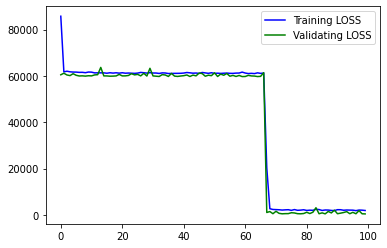

In [255]:
plt.plot(history.history["loss"], color="blue")
plt.plot(history.history["val_loss"], color="green")
plt.legend(["Training LOSS", "Validating LOSS"])
plt.show()

In [256]:
predict = model.predict(x_test)
predict.shape

58/58 [==============================] - 1s 16ms/step


(1829, 20)

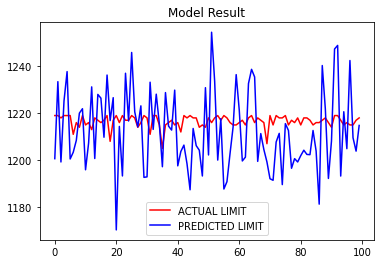

In [257]:
plt.plot([max(i) for i in y_test[0:100]], color='red', label="sum of Real values")
plt.plot([max(i) for i in predict[0:100]], color='blue', label="sum of predicted values")
plt.title("Model Result")
plt.legend(["ACTUAL LIMIT", "PREDICTED LIMIT"])
plt.show()

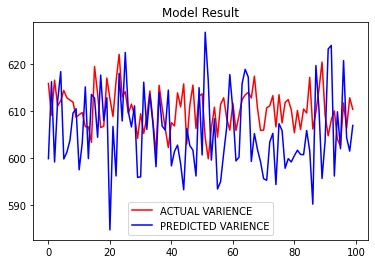

In [258]:
plt.plot([np.mean(i) for i in y_test[0:100]], color='red', label="sum of Real values")
plt.plot([np.mean(i) for i in predict[0:100]], color='blue', label="sum of predicted values")
plt.title("Model Result")
plt.legend(["ACTUAL VARIENCE", "PREDICTED VARIENCE"])
plt.show()

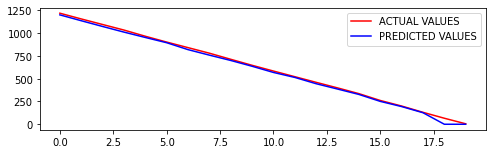

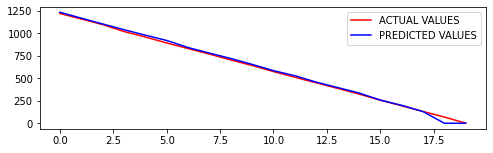

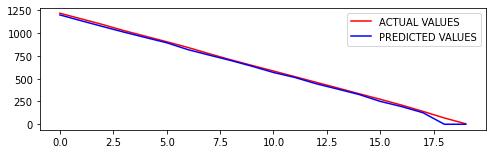

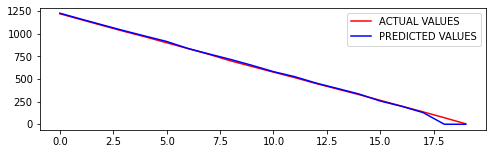

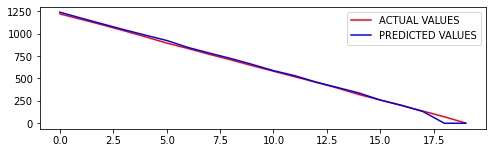

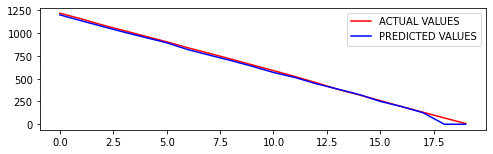

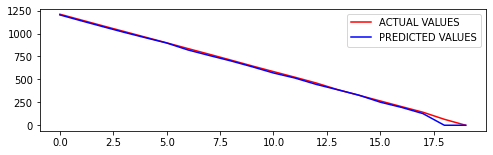

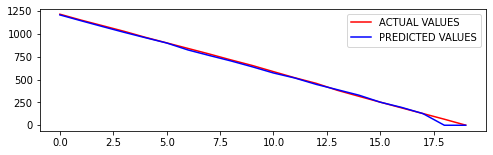

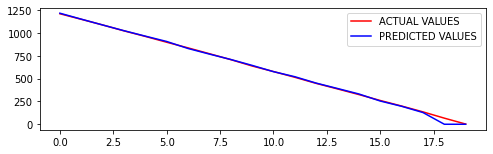

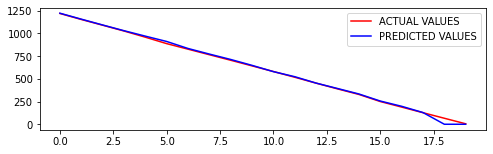

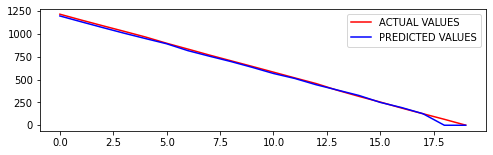

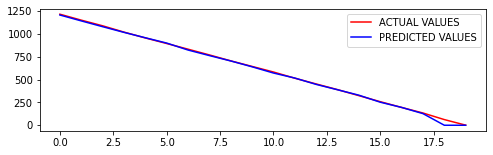

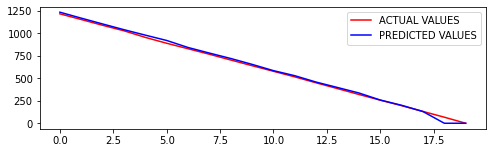

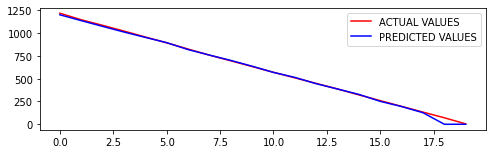

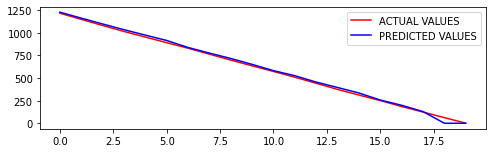

In [259]:
for i in range(15):
  plt.figure(figsize=(8, 40))
  plt.subplot(15, 1, i+1)
  plt.plot(y_test[i], color='red', label="Real values")
  plt.plot(predict[i], color='blue', label="Predicted values")
  plt.legend(["ACTUAL VALUES", "PREDICTED VALUES"])
  plt.show()

In [253]:
model.evaluate(x_test, y_test)

58/58 [==============================] - 1s 17ms/step - loss: 408.4915 - accuracy: 1.0000


[408.491455078125, 1.0]

In [254]:
y_test[0], predict[0].astype("int32")

(array([1219, 1156, 1095, 1034,  966,  902,  841,  780,  713,  647,  584,
         522,  460,  399,  336,  261,  200,  131,   66,    5]),
 array([1200, 1136, 1073, 1011,  952,  894,  819,  758,  700,  636,  568,
         513,  444,  386,  327,  251,  194,  126,    0,    0], dtype=int32))